# Spam Email Filter using NLP and Machine Learning Algorithm

####  Develop a robust Spam Email Filter using Natural Language Processing (NLP) techniques and machine learning algorithms.The goal is to create an intelligent system capable of accurately classifying emails as either spam or legitimate (ham) based on their content and linguistic features

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\documents\\phase 2\\excel\\email.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head

<bound method NDFrame.head of                                                    text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
5725  Subject: re : research and development charges...    0
5726  Subject: re : receipts from visit  jim ,  than...    0
5727  Subject: re : enron case study update  wow ! a...    0
5728  Subject: re : interest  david ,  please , call...    0
5729  Subject: news : aurora 5 . 2 update  aurora ve...    0

[5730 rows x 2 columns]>

In [3]:
df.columns

Index(['text', 'spam'], dtype='object')

In [4]:
df.shape

(5730, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


In [6]:
df['spam'] = pd.to_numeric(df['spam'], errors='coerce').fillna(0).astype(int)


In [7]:
df = df.rename(columns={'spam': 'label', 'text': 'messages'})

# Replace 1 with 'spam' and 0 with 'ham'
df['label'] = df['label'].replace({1: 'spam', 0: 'ham'})


df.head()

,messages,label
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


In [8]:
df['messages'] = df['messages'].str.replace('^Subject:', '', regex=True)
df.head()

,messages,label
0,naturally irresistible your corporate identit...,spam
1,the stock trading gunslinger fanny is merril...,spam
2,unbelievable new homes made easy im wanting ...,spam
3,4 color printing special request additional ...,spam
4,"do not have money , get software cds from her...",spam


In [9]:
df.describe()

,messages,label
count,5730,5730
unique,5697,2
top,"re : contact info glenn , please , contact ...",ham
freq,2,4362


In [10]:
df["length"] = df["messages"].apply(len)
df.sort_values(by='length', ascending=False).head(5)

,messages,label,length
1380,from the enron india newsdesk - april 27 th n...,ham,32751
2651,from the enron india newsdesk - april 27 th n...,ham,32751
2339,from the enron india newsdesk - april 23 rd n...,ham,31047
536,make thousands just sending emails . it ' s e...,spam,28424
2561,from the enron india newsdesk - may 5 - 7 new...,ham,27957


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

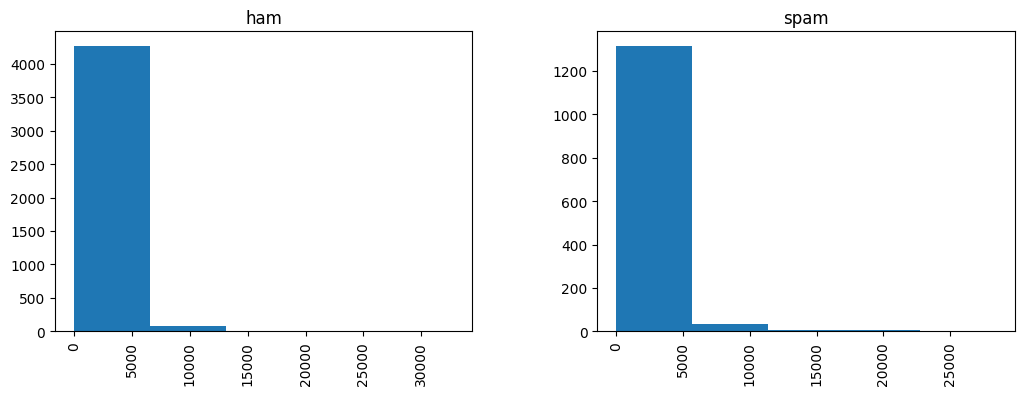

In [11]:
df.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [12]:
def transform_message(messages):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in messages:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df['messages'].head(5).apply(transform_message)

0    [, naturally, irresistible, corporate, identit...
1    [, stock, trading, gunslinger, , fanny, merril...
2    [, unbelievable, new, homes, made, easy, , im,...
3    [, 4, color, printing, special, , request, add...
4    [, money, , get, software, cds, , , software, ...
Name: messages, dtype: object

#### Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


def transform_message(message):
    return message.split() 
vectorization = CountVectorizer(analyzer=transform_message)
X = vectorization.fit_transform(df['messages']) 


In [16]:
X_transform = vectorization.transform(df['messages'])


In [17]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)

(5730, 37415)


### Classification Model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['messages'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print('predicted', predictions)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))